# ML: Homework 1 - Question 5 and 6
## Arash Latifi - 810197576
### Srping 2022

---
# Q5) Football Dataset

In [16]:
import cv2
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
images_c = [cv2.imread(file) for file in glob.glob('Q5_Dataset/Images/c*.jpg')]
images_m = [cv2.imread(file) for file in glob.glob('Q5_Dataset/Images/m*.jpg')]

In [18]:
print("Chelsea: " + str(len(images_c)) + "\tManchester: " + str(len(images_m)))

Chelsea: 64	Manchester: 58


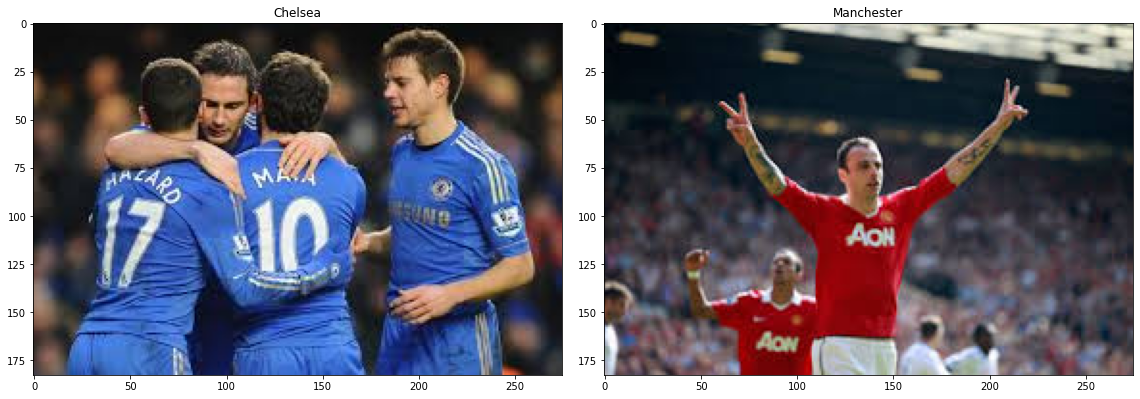

In [19]:

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv2.cvtColor(images_c[30], cv2.COLOR_BGR2RGB))
ax[0].set_title("Chelsea")
ax[1].imshow(cv2.cvtColor(images_m[30], cv2.COLOR_BGR2RGB))
ax[1].set_title("Manchester")
plt.show()

In [20]:
df = pd.DataFrame()
df['class'] = ''
df['red'] = ''
df['green'] = ''
df['blue'] = ''
for i in range(len(images_c)):
    temp = images_c[i].mean(axis=0).mean(axis=0)
    df.loc[len(df)] = ['b', temp[0], temp[1], temp[2]]
for i in range(len(images_m)):
    temp = images_m[i].mean(axis=0).mean(axis=0)
    df.loc[len(df)] = ['r', temp[0], temp[1], temp[2]]
df.head(3)

,class,red,green,blue
0,b,146.868117,113.613790,99.266885
1,b,188.230243,172.718215,171.014902
2,b,50.240636,44.929975,45.925127


In [21]:
BlueMean1 = df.head(len(images_c))['blue'].mean(axis=0)
RedMean1 = df.head(len(images_c))['red'].mean(axis=0)

BlueMean2 = df.tail(len(images_m))['blue'].mean(axis=0)
RedMean2 = df.tail(len(images_m))['red'].mean(axis=0)

print("Blue: ", BlueMean1, RedMean1)
print("Red: ", BlueMean2, RedMean2)

Blue:  81.809777703093 89.77866555178045
Red:  103.19335529761928 66.42179894732243


In [22]:
df['predicted'] = 'b'
df.loc[df['red'] < df['blue'], 'predicted'] = 'r'

In [23]:
tp = len(df.loc[(df['predicted'] == 'b') & (df['class'] == 'b')])
fp = len(df.loc[(df['predicted'] == 'b') & (df['class'] == 'r')])
tn = len(df.loc[(df['predicted'] == 'r') & (df['class'] == 'r')])
fn = len(df.loc[(df['predicted'] == 'r') & (df['class'] == 'b')])

recall = (tp+1)/(tp+fn+1)
precision = (tp+1)/(tp+fp+1)
specificity = (tn+1)/(tn+fp+1)
negative_predictive = (tn+1)/(tn+fn+1)
accuracy = (2*recall*precision+1)/(recall+precision+1)

In [24]:
import prettytable

x = prettytable.PrettyTable([" ", "Positive(Blue)", "Negative(Red)", "Score"])
x.add_row(["Positive(Blue)", "TP = " + str(tp), "FN = " + str(fn), \
            '\u001b[31m' + "Recal = " + str(round(recall,3)) + '\u001b[0m'])
x.add_row(["Negative(Red)", "FP = " + str(fp), "TN = " + str(tn), \
            "Specificity = " + str(round(specificity,3))])
x.add_row(["Score",'\u001b[31m' + "Precision = " + str(round(precision,3)) \
            + '\u001b[0m', "Neg_Pre = " + str(round(negative_predictive,3)), \
            '\u001b[31m' + "Accuracy = " + str(round(accuracy,3)) + '\u001b[0m'])
x.align = "l"
print(x)

+----------------+-------------------+-----------------+---------------------+
|                | Positive(Blue)    | Negative(Red)   | Score               |
+----------------+-------------------+-----------------+---------------------+
| Positive(Blue) | TP = 46           | FN = 18         | Recal = 0.723       |
| Negative(Red)  | FP = 1            | TN = 57         | Specificity = 0.983 |
| Score          | Precision = 0.979 | Neg_Pre = 0.763 | Accuracy = 0.894    |
+----------------+-------------------+-----------------+---------------------+


**Confusion matrix** is a table with two rows and two columns that reports the number of true positives, false negatives, false positives, and true negatives. This allows more detailed analysis than simply observing the proportion of correct classifications (accuracy).

**Precision** and **Recall** are performance metrics that apply to data retrieved from a collection.


Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results.

The traditional F-measure or balanced F-score (**F1 score**) is the harmonic mean of precision and recall

 ---

# Q6) Iris Dataset

In probabilistic classifiers, NB and MAP are 2 methods(algorithmes) which predict classes using $$ \hat{f}(x) = \argmax_x{P(X|y)} $$ The diffrence between them is that NB assuems features are independent.

In other words, the optimal Bayes decision rule is to choose the class presenting the maximum posterior probability, given the particular observation at hand. Classifiers such as these are called Bayes Optimal Classifier or Maximum a Posteriori classifiers.

## Data Preprocessing

In [25]:
import numpy as np
import pandas as pd

In [26]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  
df['target'] = iris.target

In [27]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split Train and Test

In [28]:
train = df.sample(frac = 0.7, random_state = 1)
test = df.drop(train.index)

y_train = train["target"]
x_train = train.drop("target", axis = 1)

y_test = test["target"]
x_test = test.drop("target", axis = 1)

## Normal PDF

In [29]:
def Normal(x, mu, var):
    sd = np.sqrt(var)
    pdf = (np.e ** (-0.5 * ((x - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))
    
    return pdf

In [30]:
def mNormal(x, d, mu, covar):
    pdf = (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covar))) * 
            np.exp(-(np.linalg.solve(covar, x - mu).T.dot(x - mu)) / 2))

    return pdf

## Model Training

In [31]:
means = train.groupby(["target"]).mean()
var = train.groupby(["target"]).var()
covar = train.drop(columns=["target"]).cov()
prior = (train.groupby("target").count() / len(train)).iloc[:,1]
classes = np.unique(train["target"].tolist())

## Naïve Bayes Classification

$$ P(y|X) = \frac{P(X|y)P(y)}{P(x)} $$
$$ \hat{f}(x) = \argmax_x{P(X|y)} $$
$$ \xrightarrow[]{iid} \hat{f}(x) = \argmax_x{P(x_1,x_2,x_3,x_4,...,x_d|y)} $$

In [32]:
def PredictNB(X):
    Predictions = []
    
    for i in X.index: # Loop through each instances
        
        ClassLikelihood = []
        instance = X.loc[i]
        
        for cls in classes: # Loop through each class
            
            FeatureLikelihoods = []
            FeatureLikelihoods.append(np.log(prior[cls])) # Append log prior of class 'cls'
            
            for col in x_train.columns: # Loop through each feature
                
                data = instance[col]
                
                mean = means[col].loc[cls] # Find the mean of column 'col' that are in class 'cls'
                variance = var[col].loc[cls] # Find the variance of column 'col' that are in class 'cls'
                
                Likelihood = Normal(data, mean, variance)
                
                if Likelihood != 0:
                    Likelihood = np.log(Likelihood) # Find the log-likelihood evaluated at x
                else:
                    Likelihood = 1/len(train) 
                
                FeatureLikelihoods.append(Likelihood)
                
            TotalLikelihood = sum(FeatureLikelihoods) # Calculate posterior
            ClassLikelihood.append(TotalLikelihood)
            
        MaxIndex = ClassLikelihood.index(max(ClassLikelihood)) # Find largest posterior position
        Prediction = classes[MaxIndex]
        Predictions.append(Prediction)
        
    return Predictions

In [33]:
PredictTrainNB = PredictNB(x_train)
PredictTestNB = PredictNB(x_test)

## Optimal Bayes Classification (MAP)

$$ \hat{f}(x) = \argmax_x{P(X|y)} $$

In [34]:
def PredictMap(X):
    Predictions = []
    
    for i in X.index: # Loop through each instances
        
        ClassLikelihood = []
        instance = X.loc[i]
        
        for cls in classes: # Loop through each class

            Likelihood = mNormal(instance, 4, means.iloc[cls], covar)
            if Likelihood != 0:
                Likelihood = np.log(Likelihood) # Find the log-likelihood evaluated at x
            else:
                Likelihood = 1/len(train) 

            ClassLikelihood.append(Likelihood)
            
        MaxIndex = ClassLikelihood.index(max(ClassLikelihood)) # Find largest posterior position
        Prediction = classes[MaxIndex]
        Predictions.append(Prediction)
        
    return Predictions

In [35]:
PredictTrainMap = PredictMap(x_train)
PredictTestMap = PredictMap(x_test)

## SKLearn pre-built function

In [45]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
SkTrain = clf.predict(x_train) # Predicting on the train set
SkTest = clf.predict(x_test) # Predicting on the test set

## Performance

In [37]:
def Accuracy(y, prediction):
    
    # Function to calculate accuracy
    y = list(y)
    prediction = list(prediction)
    score = 0
    
    for i, j in zip(y, prediction):
        if i == j:
            score += 1
            
    return score / len(y)

In [38]:
print("Naïve Bayes Train: ", Accuracy(y_train, PredictTrainNB))
print("Naïve Bayes Test:  ", Accuracy(y_test, PredictTestNB))

Naïve Bayes Train:  0.9809523809523809
Naïve Bayes Test:   0.9111111111111111


In [39]:
print("MAP Train: ", Accuracy(y_train, PredictTrainMap))
print("MAP Test:  ", Accuracy(y_test, PredictTestMap))

MAP Train:  0.8571428571428571
MAP Test:   0.7555555555555555


## Comparison with SKlearn

In [46]:
print("Sk_Train: ", Accuracy(y_train, SkTrain))
print("Sk_Test:  ", Accuracy(y_test, SkTest))

Sk_Train:  0.9809523809523809
Sk_Test:   0.9111111111111111


As we can see, the results of **SKlearn** and our **Naïve Bayes** implemention are identical.